In [2]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [5]:
# load in dataset 
df = pd.read_csv("train.csv")

# removing unnecessary columns

to_drop = ['Unnamed: 0',
           'artist_name',
           'track_name',
           'lyrics',
           'age']

df.drop(to_drop, inplace=True, axis=1)

# renaming columns 
new_names =  {'shake the audience': 'shake_the_audience'}

df.rename(columns=new_names, inplace=True)

/Users/amarylis/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/amarylis/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/amarylis/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/amarylis/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureW

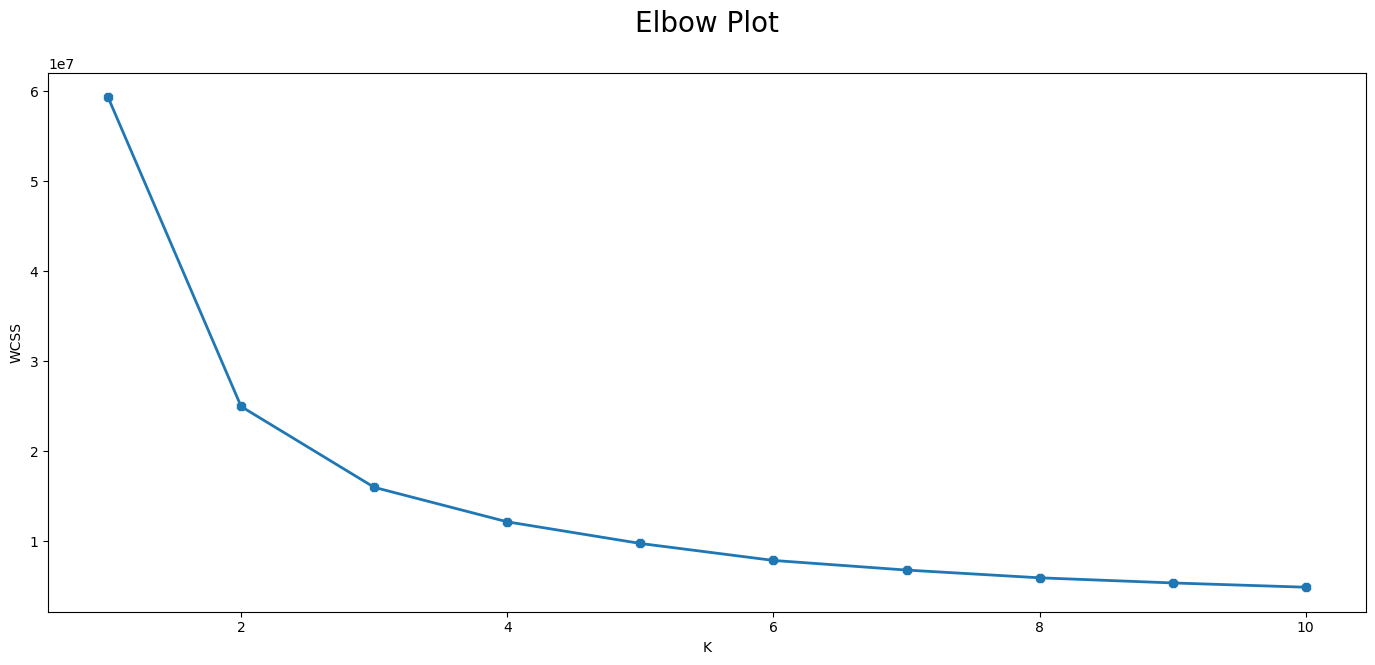

In [18]:
# create an elbow plot of WSS

X1 = df.loc[:, ["release_date", "len", "dating", "violence", "world/life", "night/time", 
                "shake_the_audience", "family/gospel", "romantic", "communication", "obscene", 
                "music", "movement/places", "light/visual perceptions", "family/spiritual", "sadness", "feelings"]].values

wcss= []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (17, 7))

plt.plot(range(1, 11), wcss, linewidth = 2, marker = '8')
plt.title('Elbow Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

/Users/amarylis/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/amarylis/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/amarylis/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/amarylis/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureW

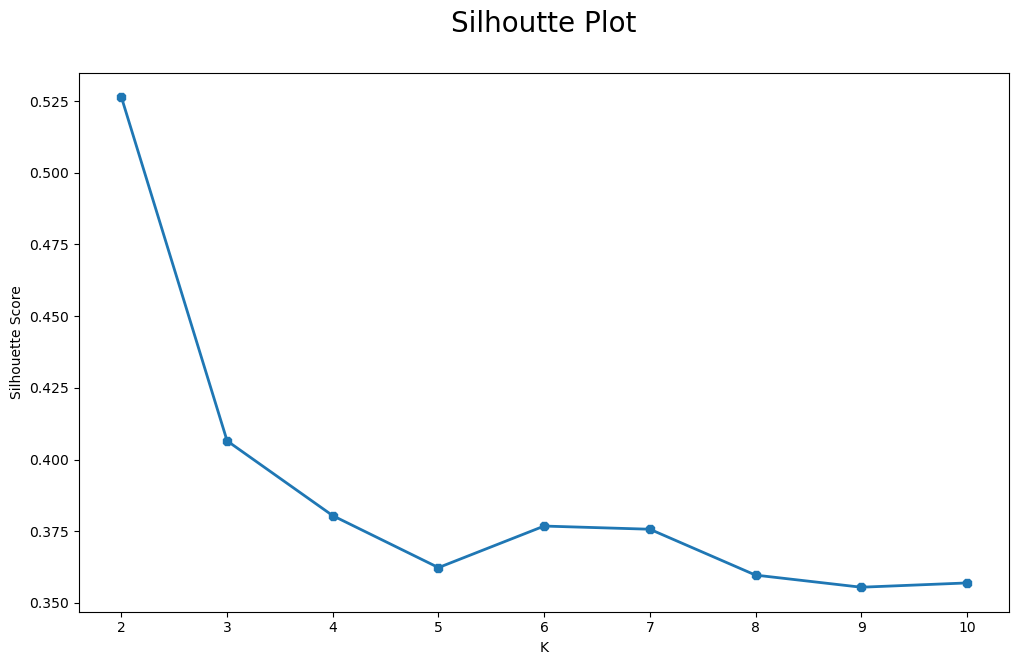

In [19]:
# plot of silhoutte score

silhouette = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    predictions = kmeans.fit_predict(X1)
    silhouette.append(metrics.silhouette_score(X1, predictions))

plt.figure(figsize = (12, 7))

plt.plot(range(2, 11), silhouette, linewidth = 2, marker = '8')
plt.title('Silhoutte Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()

In [23]:
# create a KMeans object with this optimal number of clusters. Name this object `kmeans`

kmeans = KMeans(n_clusters = 3)

# fit KMeans object using `X1` data

clusters = kmeans.fit_predict(X1)
clusters

/Users/amarylis/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 0, 0, ..., 2, 2, 2], dtype=int32)

In [27]:
# generate labels for the dataset

labels = kmeans.fit_predict(X1)
labels

/Users/amarylis/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 1, 1, ..., 2, 2, 2], dtype=int32)

In [28]:
# output  centroids of clusters

kmeans.cluster_centers_

array([[1.99873154e+03, 1.55332910e+02, 1.87687273e-02, 1.18676205e-01,
        8.00942217e-02, 4.04561550e-02, 2.51853596e-02, 1.66284295e-02,
        1.88703507e-02, 6.47317679e-02, 2.83613695e-01, 3.87798115e-02,
        6.60740330e-02, 3.61384945e-02, 2.32557671e-02, 5.38611003e-02,
        2.71383811e-02],
       [1.98397653e+03, 4.12806192e+01, 2.22505824e-02, 9.98807323e-02,
        1.38014860e-01, 6.15111520e-02, 1.38240622e-02, 1.69742605e-02,
        6.65577916e-02, 8.12582547e-02, 4.60537102e-02, 7.02461005e-02,
        3.65143403e-02, 5.21592215e-02, 2.40186929e-02, 1.55131095e-01,
        3.28674066e-02],
       [1.99546328e+03, 8.46387233e+01, 2.04590838e-02, 1.43175639e-01,
        1.13522776e-01, 5.81584347e-02, 1.93199241e-02, 1.72983548e-02,
        3.58681595e-02, 7.49563502e-02, 9.54649320e-02, 5.44126851e-02,
        5.50416361e-02, 4.96367679e-02, 2.46789384e-02, 1.23345331e-01,
        2.99331517e-02]])

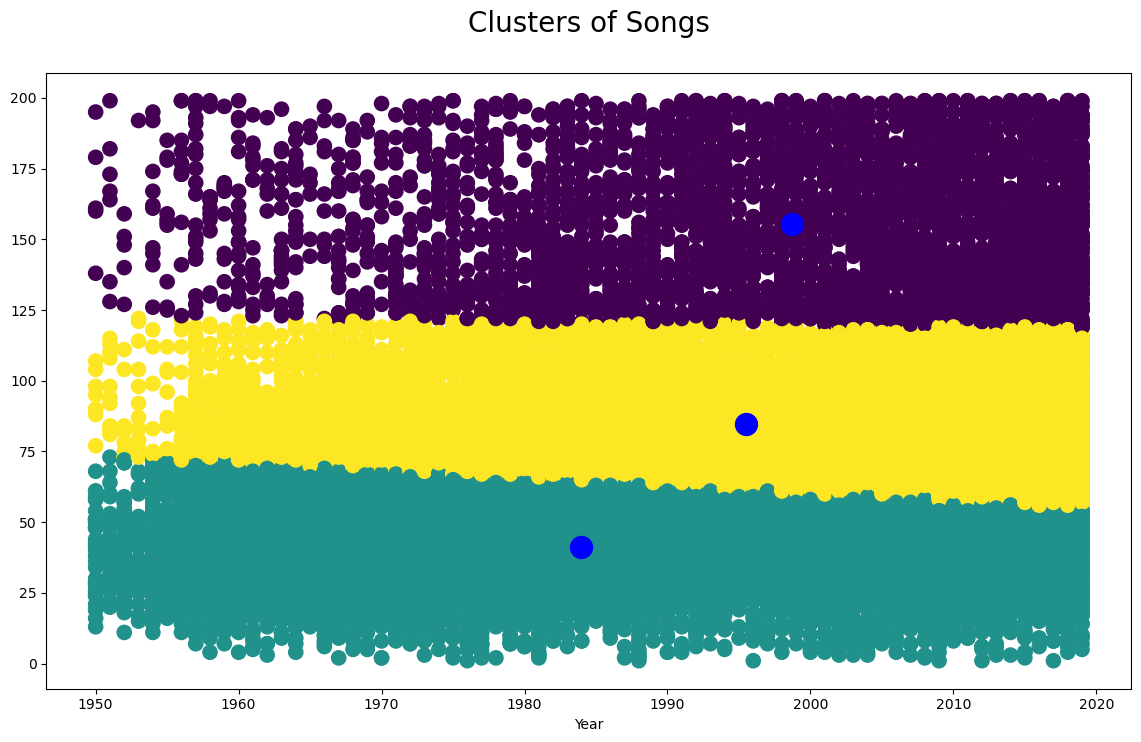

In [32]:
# view 2D clusters

plt.figure(figsize = (14, 8))

plt.scatter(X1[:, 0], X1[:, 1], c = kmeans.labels_, s = 105)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'blue', s = 250)
plt.title('Clusters of Songs\n', fontsize = 20)
plt.xlabel('Year')
plt.show()